In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def sample_distribution(p):
    if random.uniform(0, 1) < p:
        return '0'
    else:
        return '1'

In [39]:
def binary2decimal(key):
    decimal = 0
    for k in range(len(key)):
        decimal += int(key[k]) * (2 ** (len(key) - k - 1))
    return decimal

In [40]:
def calculate_weight(decimal, alpha, z):
    return (alpha ** abs(z - decimal)) * (1 - alpha)/(1 + alpha)

In [41]:
def sample_data(dic, p, n, alpha, z):
    binary = ''
    for j in range(n):
        sub_key = sample_distribution(p)
        binary += sub_key
    decimal = binary2decimal(binary)
    weight = calculate_weight(decimal, alpha, z)

    if binary in dic:
        dic[binary] += weight
    else:
        dic[binary] = weight
    return dic

In [42]:
def compute_target(dic, i, sum_all, sum_sub):
    for k in dic:
        sum_all += dic[k]
        if k[i] == '1':
            sum_sub += dic[k]
    return float(sum_sub)/sum_all

In [50]:
if __name__ == '__main__':
    N = 10
    ALPHA = 0.2
    Z = 128
    sample_amount = 500000
    P = 0.5
    
    sum_all = 0
    sum_sub = [0 for _ in range(11)]
    dic = {}
    x = np.arange(1, sample_amount + 1)
    result2 = []
    result4 = []
    result6 = []
    result8 = []
    result10 = []
    
    for k in range(0, sample_amount):
        sample_data(dic, P, N, ALPHA, Z)
        result2.append(compute_target(dic, N - 2, sum_all, sum_sub[2]))
        result4.append(compute_target(dic, N - 4, sum_all, sum_sub[4]))
        result6.append(compute_target(dic, N - 6, sum_all, sum_sub[6]))
        result8.append(compute_target(dic, N - 8, sum_all, sum_sub[8]))
        result10.append(compute_target(dic, N - 10, sum_all, sum_sub[10]))

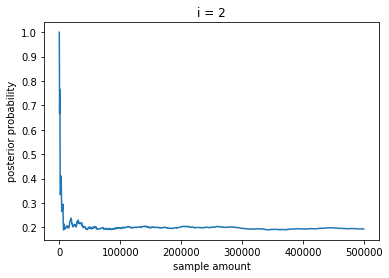

In [52]:
plt.title('i = 2')
plt.plot(x[0:len(x):500], result2[0:len(x):500])
plt.xlabel("sample amount")
plt.ylabel("posterior probability")

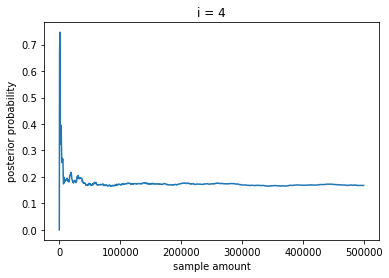

In [53]:
plt.title('i = 4')
plt.plot(x[0:len(x):500], result4[0:len(x):500])
plt.xlabel("sample amount")
plt.ylabel("posterior probability")

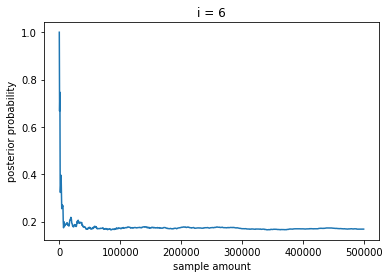

In [54]:
plt.title('i = 6')
plt.plot(x[0:len(x):500], result6[0:len(x):500])
plt.xlabel("sample amount")
plt.ylabel("posterior probability")

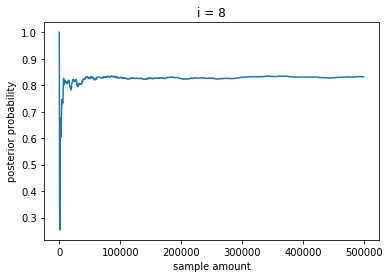

In [55]:
plt.title('i = 8')
plt.plot(x[0:len(x):500], result8[0:len(x):500])
plt.xlabel("sample amount")
plt.ylabel("posterior probability")

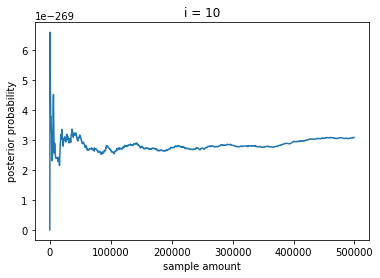

In [57]:
plt.title('i = 10')
plt.plot(x[0:len(x):500], result10[0:len(x):500])
plt.xlabel("sample amount")
plt.ylabel("posterior probability")

In [60]:
print("P(B2 = 1|Z = 128) = " + str(result2[-1]))
print("P(B4 = 1|Z = 128) = " + str(result4[-1]))
print("P(B6 = 1|Z = 128) = " + str(result6[-1]))
print("P(B8 = 1|Z = 128) = " + str(result8[-1]))
print("P(B10 = 1|Z = 128) = " + str(result10[-1]))

P(B2 = 1|Z = 128) = 0.193426810175
P(B4 = 1|Z = 128) = 0.167772123764
P(B6 = 1|Z = 128) = 0.167770524847
P(B8 = 1|Z = 128) = 0.832229475153
P(B10 = 1|Z = 128) = 3.07497729109e-269
